### Convert image to patch.

In [ ]:
import os
import rasterio as rio
from pyrsimg import imgShow, imsShow
from pyrsimg import img2patch
from pyrsimg import crop2size, crop2extent
import matplotlib.pyplot as plt
import numpy as np


In [5]:
root_path = os.getcwd().split('pyrsimg')[0] + 'pyrsimg'
path_img = root_path + '/docs/source/examples/data/l8_scene_05.tif'
path_truth = root_path + '/docs/source/examples/data/l8_scene_05_truth.tif'


#### 1. Read the remote sensing image.

In [8]:
# l8_img = readTiff(path_img)
# l8_truth = readTiff(path_truth)
# l8_img.array.shape

with rio.open(path_img) as rsimg_rio:
    rsimg_arr = rsimg_rio.read().transpose(1, 2, 0)
with rio.open(path_truth) as truthimg_rio:
    truthimg_arr = truthimg_rio.read().transpose(1, 2, 0)


#### 2. Visualize the image.

Text(0.5, 1.0, 'ground truth')

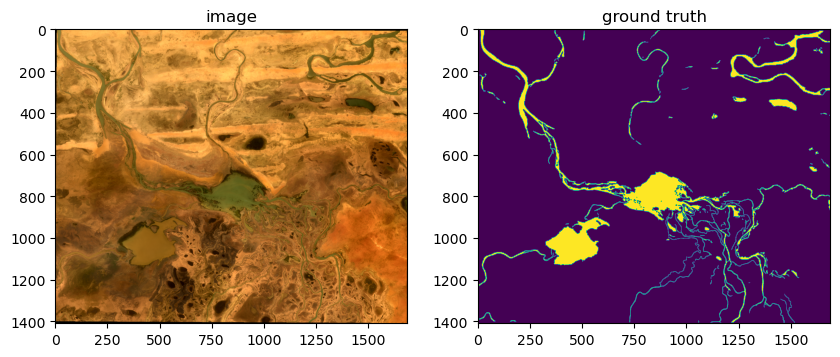

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
imgShow(rsimg_arr, ax=ax[0])
ax[1].imshow(truthimg_arr)
ax[0].set_title('image')
ax[1].set_title('ground truth')


#### 3. Convert the full image to multiple patches.
3.1 Convert image to patches.

In [11]:
imgPat_ins = img2patch(img=rsimg_arr, patch_size=200, edge_overlay = 30)
patch_low_list = imgPat_ins.toPatch()
print('The number of patches from image:' ,len(patch_low_list))


The number of patches from image: 99


3.2. Convert image to higher-scale patches.


In [12]:
patch_high_list = imgPat_ins.higher_patch_crop(higher_patch_size=300)


3.3. Check the converted multiscale patches.

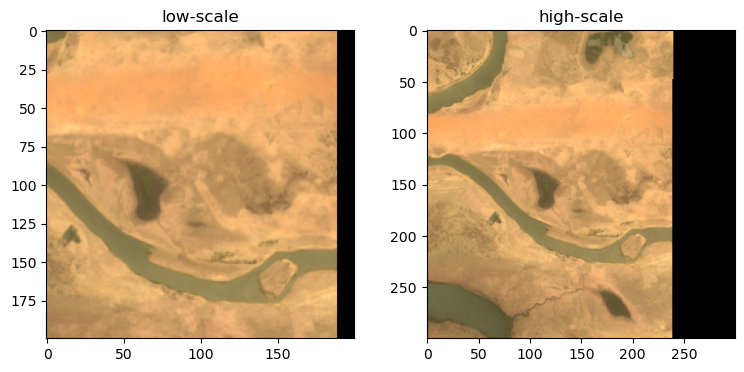

In [16]:
i_img = 20
fig, ax = plt.subplots(1, 2, figsize=(9,4))
axs = imsShow(img_list=[patch_low_list[i_img], patch_high_list[i_img]], \
                    img_name_list=['low-scale', 'high-scale'], 
                    clip_list=[2,2], axs=ax)


#### 4. Crop image.
4.1 Image cropping with specific size


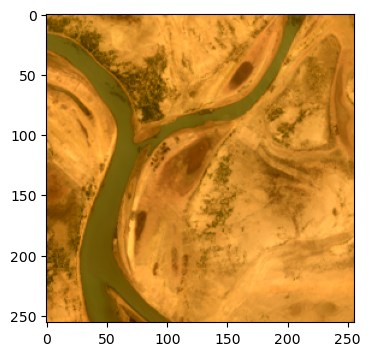

In [20]:
img2size = crop2size(img=rsimg_arr, channel_first=False)
patch = img2size.toSize(size=(256,256))
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax_img = imgShow(patch)


4.2. Image cropping with multiscale sizes.


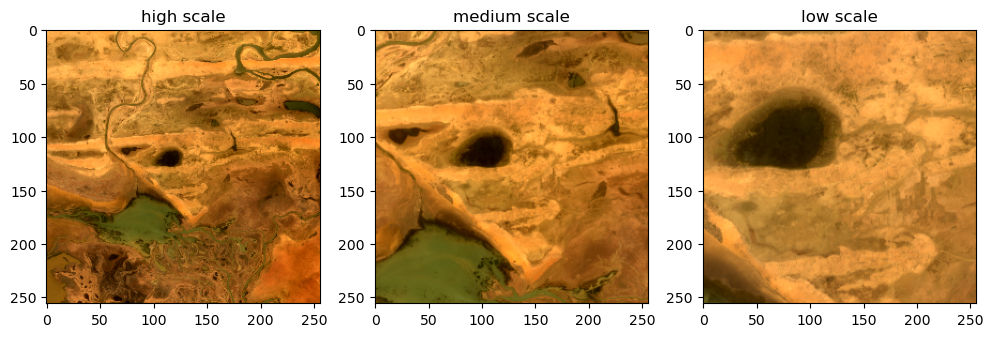

In [23]:
fig, axs = plt.subplots(1,3,figsize=(12, 4))
patches = img2size.toScales(scales=(1024,512,256))
axs = imsShow(img_list=patches, img_name_list=['high scale', 'medium scale', 'low scale'], axs=axs)


4.3. Image cropping with specific extent

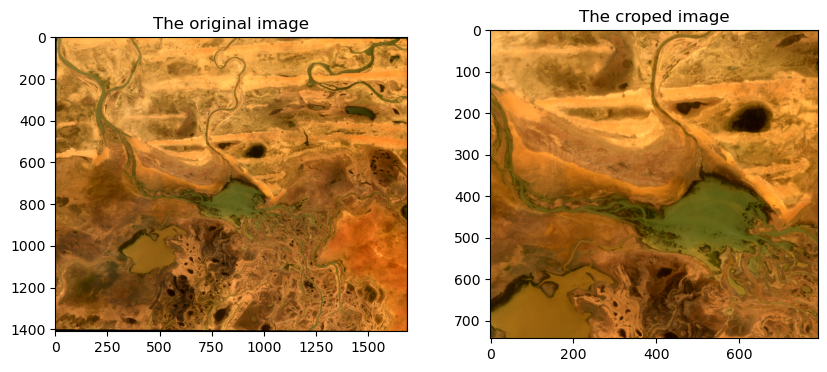

In [26]:
img2extent = crop2extent(extent=[368155.0, 391855.0, 1683985.0, 1706285.0])
patch_extent = img2extent.img2extent(path_img=path_img)
fig, ax = plt.subplots(1,2,figsize=(10,4))
imgShow(img=rsimg_arr, ax=ax[0])
ax[0].set_title('The original image')
imgShow(patch_extent, ax=ax[1])
ax[1].set_title('The croped image');
